<a href="https://colab.research.google.com/github/Anjalichimnani/EVA4_Custom_Data/blob/master/Assignment15A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
#https://modelzoo.co/model/data-augmentation-and-sampling-for-pytorch

In [111]:
!git clone https://github.com/Anjalichimnani/EVA4_Custom_Data.git

Cloning into 'EVA4_Custom_Data'...
remote: Enumerating objects: 331, done.
remote: Counting objects: 100% (331/331), done.
remote: Compressing objects: 100% (323/323), done.
remote: Total 331 (delta 9), reused 327 (delta 5), pack-reused 0
Receiving objects: 100% (331/331), 4.98 MiB | 21.50 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [112]:
!git clone https://github.com/ialhashim/DenseDepth.git

Cloning into 'DenseDepth'...
remote: Enumerating objects: 235, done.
remote: Total 235 (delta 0), reused 0 (delta 0), pack-reused 235
Receiving objects: 100% (235/235), 11.80 MiB | 24.70 MiB/s, done.
Resolving deltas: 100% (115/115), done.


In [113]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/EVA4/Assignment_15/15A/files/')
from imports.imports_eva import *

from supplements.Supplements import Supplements

In [115]:
import time
import glob
import torch
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.0+cu101 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [8]:
!ls

DenseDepth  EVA4_Custom_Data  gdrive  sample_data


In [9]:
cd EVA4_Custom_Data

/content/EVA4_Custom_Data


In [13]:
!ls

addon_images  bg_images  fg_images  mask_images  README.md


In [116]:
!mkdir fg_images_flip
!mkdir mask_images_flip

!mkdir fg_bg_images
!mkdir mask_bg_images

mkdir: cannot create directory ‘fg_images_flip’: File exists
mkdir: cannot create directory ‘mask_images_flip’: File exists
mkdir: cannot create directory ‘fg_bg_images’: File exists
mkdir: cannot create directory ‘mask_bg_images’: File exists


In [0]:
!mkdir bg_images_all

In [0]:
Supplements.flip_image_alpha ('/content/EVA4_Custom_Data/fg_images/', '/content/EVA4_Custom_Data/fg_images_flip/')

In [0]:
Supplements.flip_image_wo_alpha ('/content/EVA4_Custom_Data/mask_images/', '/content/EVA4_Custom_Data/mask_images_flip/')

In [17]:
!ls mask_images_flip

img001.jpg  img018.jpg	img035.jpg  img052.jpg	img069.jpg  img086.jpg
img002.jpg  img019.jpg	img036.jpg  img053.jpg	img070.jpg  img087.jpg
img003.jpg  img020.jpg	img037.jpg  img054.jpg	img071.jpg  img088.jpg
img004.jpg  img021.jpg	img038.jpg  img055.jpg	img072.jpg  img089.jpg
img005.jpg  img022.jpg	img039.jpg  img056.jpg	img073.jpg  img090.jpg
img006.jpg  img023.png	img040.jpg  img057.jpg	img074.jpg  img091.jpg
img007.jpg  img024.jpg	img041.jpg  img058.jpg	img075.jpg  img092.jpg
img008.jpg  img025.jpg	img042.jpg  img059.jpg	img076.jpg  img093.jpg
img009.jpg  img026.jpg	img043.jpg  img060.jpg	img077.jpg  img094.jpg
img010.jpg  img027.jpg	img044.jpg  img061.jpg	img078.jpg  img095.jpg
img011.jpg  img028.jpg	img045.jpg  img062.jpg	img079.jpg  img096.jpg
img012.jpg  img029.jpg	img046.jpg  img063.jpg	img080.jpg  img097.jpg
img013.jpg  img030.jpg	img047.jpg  img064.jpg	img081.jpg  img098.jpg
img014.jpg  img031.jpg	img048.jpg  img065.jpg	img082.jpg  img099.jpg
img015.jpg  img032.jpg	img049.jpg 

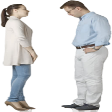

In [119]:
image = cv2.imread ('/content/EVA4_Custom_Data/fg_images/img001.png', cv2.IMREAD_UNCHANGED)
cv2_imshow (image)

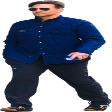

In [19]:
fg_image = cv2.imread ('/content/EVA4_Custom_Data/fg_images_flip/img050.png', cv2.IMREAD_UNCHANGED)
cv2_imshow (fg_image)

In [0]:
Supplements.overlay_images (bgpath = '/content/EVA4_Custom_Data/bg_images/', fgpath = '/content/EVA4_Custom_Data/fg_images/', newpath = '/content/EVA4_Custom_Data/fg_bg_images/', name_prefix = 'base', bg_img_size = 224, fg_img_size = 112)

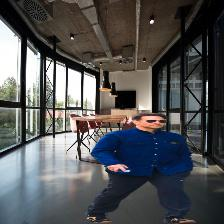

In [122]:
fg_bg_image = cv2.imread ('/content/EVA4_Custom_Data/fg_bg_images/base_fg_img050_bg_img099_04.jpg')
cv2_imshow (fg_bg_image)

In [0]:
Supplements.overlay_images (bgpath = '/content/EVA4_Custom_Data/bg_images/', fgpath = '/content/EVA4_Custom_Data/fg_images_flip/', newpath = '/content/EVA4_Custom_Data/fg_bg_images/', name_prefix = 'flip', bg_img_size = 224, fg_img_size = 112)

In [23]:
!ls fg_bg_images | wc - l

 400000  400000 12800000 -
wc: l: No such file or directory
 400000  400000 12800000 total


In [0]:
Supplements.overlay_mask_images (bgpath = '/content/EVA4_Custom_Data/addon_images/', fgpath = '/content/EVA4_Custom_Data/mask_images/', newpath = '/content/EVA4_Custom_Data/mask_bg_images/', name_prefix = 'base', bg_img_size = 224, fg_img_size = 112)

In [0]:
Supplements.overlay_mask_images (bgpath = '/content/EVA4_Custom_Data/addon_images/', fgpath = '/content/EVA4_Custom_Data/mask_images_flip/', newpath = '/content/EVA4_Custom_Data/mask_bg_images/', name_prefix = 'flip', bg_img_size = 224, fg_img_size = 112)

In [0]:
Supplements.load_all_images (bgpath = '/content/EVA4_Custom_Data/bg_images/', fgpath = '/content/EVA4_Custom_Data/fg_images', newpath = '/content/EVA4_Custom_Data/bg_images_all/', name_prefix = 'base', bg_img_size = 224, fg_img_size = 112)

In [0]:
Supplements.load_all_images (bgpath = '/content/EVA4_Custom_Data/bg_images/', fgpath = '/content/EVA4_Custom_Data/fg_images_flip', newpath = '/content/EVA4_Custom_Data/bg_images_all/', name_prefix = 'flip', bg_img_size = 224, fg_img_size = 112)

In [123]:
!wget https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5 -O /content/DenseDepth/nyu.h5

--2020-06-14 14:57:22--  https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.53.10
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.53.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172897376 (165M) [application/h5]
Saving to: ‘/content/DenseDepth/nyu.h5’

/content/DenseDepth 100%[===================>] 164.89M  27.4MB/s    in 6.7s    

2020-06-14 14:57:29 (24.7 MB/s) - ‘/content/DenseDepth/nyu.h5’ saved [172897376/172897376]



In [0]:
!rm /content/DenseDepth/layers.py


In [125]:
!gsutil cp '/content/gdrive/My Drive/EVA4/Assignment_15/15A/files/densedepth/layers.py' /content/DenseDepth/

Copying file:///content/gdrive/My Drive/EVA4/Assignment_15/15A/files/densedepth/layers.py...
/ [1 files][  2.1 KiB/  2.1 KiB]                                                
Operation completed over 1 objects/2.1 KiB.                                      


In [126]:
!cd /content/DenseDepth; python test.py --input 'examples/*.png'

Using TensorFlow backend.
Loading model...

Model loaded (nyu.h5).

Loaded (12) images of size (480, 640, 3).
<Figure size 1000x500 with 1 Axes>


In [127]:
from keras.engine.topology import Layer, InputSpec
import keras.utils.conv_utils as conv_utils
import tensorflow as tf
import keras.backend as K

Using TensorFlow backend.


In [0]:
import sys
sys.path.append('/content/DenseDepth/')

from layers import BilinearUpSampling2D
from utils import predict, load_images, display_images

In [0]:
import os
import glob
import argparse
import matplotlib

# Keras / TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'
from keras.models import load_model
from layers import BilinearUpSampling2D
from utils import predict, load_images, display_images
from matplotlib import pyplot as plt

In [0]:
custom_objects = {'BilinearUpSampling2D': BilinearUpSampling2D, 'depth_loss_function': None}

In [0]:
model = load_model('/content/DenseDepth/nyu.h5', custom_objects=custom_objects, compile=False)

In [0]:
inputs = load_images( glob.glob('/content/EVA4_Custom_Data/bg_images/*.jpg') )

In [0]:
outputs = predict(model, inputs)

In [0]:
!rm -rf /content/EVA4_Custom_Data/output_images
!mkdir /content/EVA4_Custom_Data/output_images

In [0]:
from google.colab import output

basepath = '/content/EVA4_Custom_Data/bg_images'
newpath = '/content/gdrive/My Drive/EVA4/Assignment_15/15A/data/'
file_names = [entry for entry in os.scandir(basepath) if entry.is_file()]
file_names = sorted (file_names, key=lambda file_name: file_name.path)

for idx in range (5):
  print (file_names[idx].path)

/content/EVA4_Custom_Data/bg_images/img001.jpg
/content/EVA4_Custom_Data/bg_images/img002.jpg
/content/EVA4_Custom_Data/bg_images/img003.jpg
/content/EVA4_Custom_Data/bg_images/img004.jpg
/content/EVA4_Custom_Data/bg_images/img005.jpg


In [0]:
from google.colab import output

basepath = '/content/EVA4_Custom_Data/fg_bg_images'
newpath = '/content/gdrive/My Drive/EVA4/Assignment_15/15A/data/'
file_names = [entry for entry in os.scandir(basepath) if entry.is_file()]
file_names = sorted (file_names, key=lambda file_name: file_name.path)

print (len(file_names))
for idx_out, file_name in enumerate (file_names):
  inputs = load_images( glob.glob(file_names[idx_out].path) )
  outputs = predict(model, inputs)
  viz = display_images(outputs.copy(), is_colormap=False, is_rescale=False)

  #plt.figure(figsize=(10,5))
  plt.worksimshow(viz)
  plt.savefig(newpath + file_names[idx_out].name)
  
  if idx_out == 10:
    output.clear()


200000


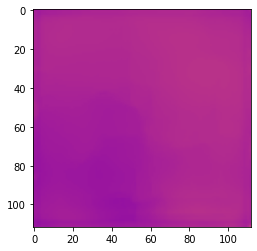

In [150]:
from google.colab import output

basepath = '/content/EVA4_Custom_Data/fg_bg_images'
newpath = '/content/EVA4_Custom_Data/output_images/'
file_names = [entry for entry in os.scandir(basepath) if entry.is_file()]
file_names = sorted (file_names, key=lambda file_name: file_name.path)

print (len(file_names))
for idx_out, file_name in enumerate (file_names):
  inputs = load_images( glob.glob(file_names[idx_out].path) )
  outputs = predict(model, inputs)
  viz = display_images(outputs.copy(), is_colormap=True, is_rescale=False)

  #plt.figure(figsize=(10,5))
  plt.imshow(viz)
  plt.savefig(newpath + file_names[idx_out].name)
  
  if idx_out == 25:
    break


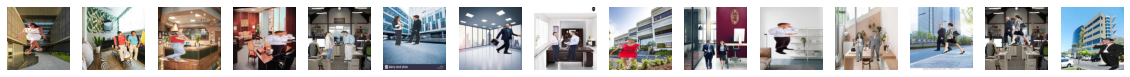

In [146]:
def show_images (path, num):
  plt.figure(figsize=(20, 20))
  file_names = [entry for entry in os.scandir(path) if entry.is_file()]

  for idx in range (num):
    img = plt.imread(file_names[idx].path)
    plt.subplot(1, num, idx + 1)
    plt.imshow(img)
    plt.axis('off')

  plt.show()

show_images ('/content/EVA4_Custom_Data/fg_bg_images/', 15)